In [ ]:
import requests
import pandas as pd

url = "https://en.wikipedia.org/wiki/2021%E2%80%9322_UEFA_Champions_League"
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
if resp.status_code != 200:
    raise SystemExit(f"Ошибка загрузки страницы: {resp.status_code}")

tables = pd.read_html(resp.text)

association_table = None
for t in tables:
    if "Association" in t.columns or "Rank" in t.columns:
        association_table = t
        break

if association_table is not None:
    print("\n Таблица рейтинга ассоциаций:")
    print(association_table.head())
    association_table.to_csv("ucl_2021_22_association_ranking.csv", index=False)
else:
    print(" Таблица ассоциаций не найдена.")

top_scorers = None
for t in tables:
    cols = [str(c).lower() for c in t.columns]
    if any("goal" in c for c in cols) and any("player" in c or "name" in c for c in cols):
        top_scorers = t
        break

if top_scorers is not None:
    # Берём только первые 10 строк
    top_scorers = top_scorers.head(10)
    print("\n⚽ Топ 10 бомбардиров:")
    print(top_scorers.head())

    goal_col = [c for c in top_scorers.columns if "goal" in c.lower()][0]
    minutes_col = [c for c in top_scorers.columns if "minute" in c.lower()] or None

    top_scorers[goal_col] = pd.to_numeric(top_scorers[goal_col], errors="coerce")

    if minutes_col:
        minutes_col = minutes_col[0]
        top_scorers[minutes_col] = pd.to_numeric(top_scorers[minutes_col], errors="coerce")
        top_scorers["Minutes per Goal"] = (top_scorers[minutes_col] / top_scorers[goal_col]).round(1)
    else:
        top_scorers["Minutes per Goal"] = None

    total_goals = top_scorers[goal_col].sum()
    avg_goals = top_scorers[goal_col].mean()
    median_goals = top_scorers[goal_col].median()
    max_goals = top_scorers[goal_col].max()
    min_goals = top_scorers[goal_col].min()
    best_scorer = top_scorers.loc[top_scorers[goal_col].idxmax()]

    print("\n Метрики топ-10 бомбардиров:")
    print(f" Лучший бомбардир: {best_scorer.iloc[0]} — {best_scorer[goal_col]} голов")
    print(f" Всего голов (топ-10): {total_goals}")
    print(f" Среднее число голов: {avg_goals:.2f}")
    print(f" Медиана: {median_goals}")
    print(f" Макс: {max_goals},  Мин: {min_goals}")

    # --- Группировка по клубам ---
    club_col = [c for c in top_scorers.columns if "club" in c.lower() or "team" in c.lower()]
    if club_col:
        club_stats = top_scorers.groupby(club_col[0])[goal_col].sum().sort_values(ascending=False)
        print("\n Голы по клубам (топ-10 бомбардиров):")
        print(club_stats)

    # --- Сохраняем итоговую таблицу ---
    top_scorers.to_csv("ucl_2021_22_top10_scorers.csv", index=False)
    print("\n Файл ucl_2021_22_top10_scorers.csv сохранён!")

else:
    print(" Таблица бомбардиров не найдена.")

print("\n Все CSV-файлы сохранены:")
print("- ucl_2021_22_association_ranking.csv")
print("- ucl_2021_22_top10_scorers.csv")



✅ Найдено таблиц: 33

📊 Таблица рейтинга ассоциаций:
   Rank Association   Coeff.  Teams     Notes
0     1       Spain  102.283      4  +1 (UEL)
1     2     England   90.462      4       NaN
2     3     Germany   74.784      4       NaN
3     4       Italy   70.653      4       NaN
4     5      France   59.248      3       NaN

⚽ Топ 10 бомбардиров:
   Rank[35]              Player           Team  Goals  Minutes played
0         1       Karim Benzema    Real Madrid     15            1106
1         2  Robert Lewandowski  Bayern Munich     13             876
2         3    Sébastien Haller           Ajax     11             668
3         4       Mohamed Salah      Liverpool      8            1008
4         5  Christopher Nkunku     RB Leipzig      7             531

📈 Метрики топ-10 бомбардиров:
🏆 Лучший бомбардир: 1 — 15 голов
⚽ Всего голов (топ-10): 85
📊 Среднее число голов: 8.50
🔹 Медиана: 7.0
⬆️ Макс: 15, ⬇️ Мин: 6

🏟️ Голы по клубам (топ-10 бомбардиров):
Team
Bayern Munich          19

/tmp/ipython-input-3002572357.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(resp.text)
/tmp/ipython-input-3002572357.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_scorers[goal_col] = pd.to_numeric(top_scorers[goal_col], errors="coerce")
/tmp/ipython-input-3002572357.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_scorers[minutes_col] = 

/tmp/ipython-input-3992117669.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(resp.text)


Найдено таблиц: 33


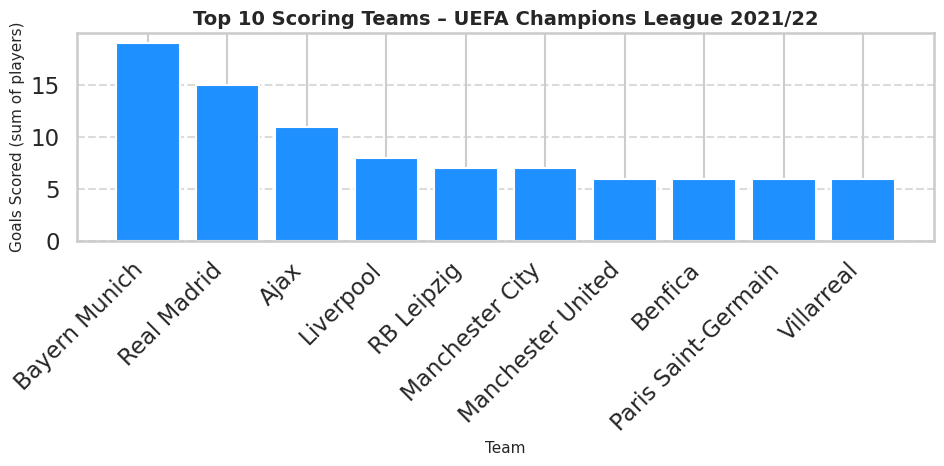

In [17]:
import pandas as pd
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://en.wikipedia.org/wiki/2021%E2%80%9322_UEFA_Champions_League"
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.raise_for_status()

tables = pd.read_html(resp.text)
print(f"Найдено таблиц: {len(tables)}")

top_scorers = None
for t in tables:
    cols = [str(c).lower() for c in t.columns]
    if any("goal" in c for c in cols) and any("player" in c or "name" in c for c in cols):
        top_scorers = t
        break

if top_scorers is None:
    raise SystemExit("Таблица с бомбардирами не найдена.")

goal_col = [c for c in top_scorers.columns if "goal" in c.lower()][0]
team_col = [c for c in top_scorers.columns if "team" in c.lower() or "club" in c.lower()][0]

top_scorers[goal_col] = pd.to_numeric(top_scorers[goal_col], errors="coerce")
top_scorers = top_scorers[[team_col, goal_col]].dropna()

team_goals = top_scorers.groupby(team_col)[goal_col].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(team_goals.index, team_goals.values, color='dodgerblue')
plt.title("Top 10 Scoring Teams – UEFA Champions League 2021/22", fontsize=14, weight='bold')
plt.xlabel("Team", fontsize=11)
plt.ylabel("Goals Scored (sum of players)", fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





/tmp/ipython-input-3990839314.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(resp.text)


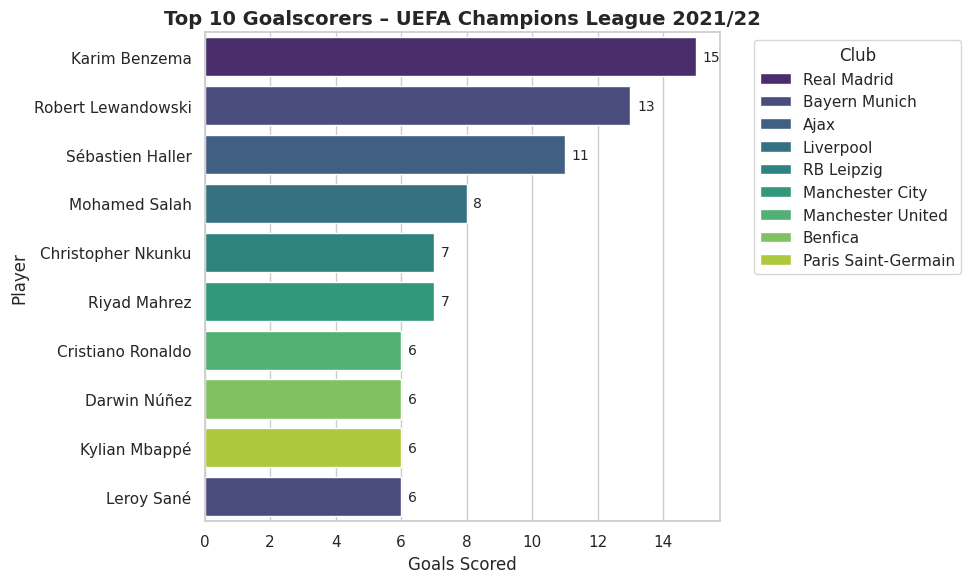

In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://en.wikipedia.org/wiki/2021%E2%80%9322_UEFA_Champions_League"
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.raise_for_status()
tables = pd.read_html(resp.text)

top_scorers = None
for t in tables:
    cols = [str(c).lower() for c in t.columns]
    if any("goal" in c for c in cols) and any("player" in c or "name" in c for c in cols):
        top_scorers = t
        break

if top_scorers is None:
    raise SystemExit(" Таблица с бомбардирами не найдена.")

goal_col = [c for c in top_scorers.columns if "goal" in c.lower()][0]
player_col = [c for c in top_scorers.columns if "player" in c.lower() or "name" in c.lower()][0]
team_col = [c for c in top_scorers.columns if "team" in c.lower() or "club" in c.lower()][0]

top_scorers[goal_col] = pd.to_numeric(top_scorers[goal_col], errors="coerce")
top10 = top_scorers[[player_col, team_col, goal_col]].dropna().head(10)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

bar = sns.barplot(
    data=top10,
    x=goal_col, y=player_col,
    hue=team_col,
    palette="viridis", dodge=False
)

plt.title("Top 10 Goalscorers – UEFA Champions League 2021/22", fontsize=14, weight='bold')
plt.xlabel("Goals Scored", fontsize=12)
plt.ylabel("Player", fontsize=12)
plt.legend(title="Club", bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (value, name) in enumerate(zip(top10[goal_col], top10[player_col])):
    plt.text(value + 0.2, i, str(int(value)), va='center', fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2504813247.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(resp.text)


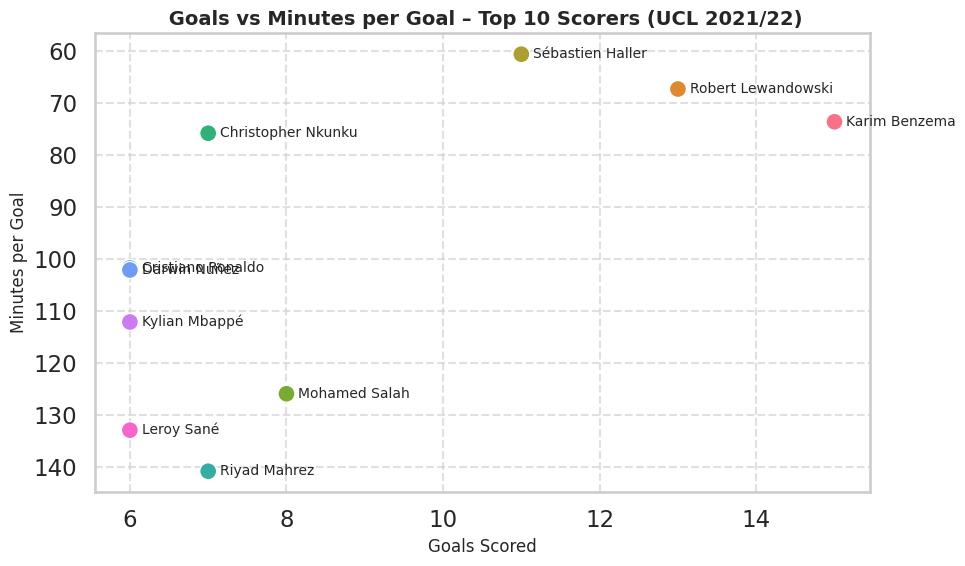

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://en.wikipedia.org/wiki/2021%E2%80%9322_UEFA_Champions_League"
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.raise_for_status()
tables = pd.read_html(resp.text)

top_scorers = None
for t in tables:
    cols = [str(c).lower() for c in t.columns]
    if any("goal" in c for c in cols) and any("player" in c or "name" in c for c in cols):
        top_scorers = t
        break

goal_col = [c for c in top_scorers.columns if "goal" in c.lower()][0]
player_col = [c for c in top_scorers.columns if "player" in c.lower() or "name" in c.lower()][0]
minutes_col = [c for c in top_scorers.columns if "minute" in c.lower()][0]

top_scorers[goal_col] = pd.to_numeric(top_scorers[goal_col], errors="coerce")
top_scorers[minutes_col] = pd.to_numeric(top_scorers[minutes_col], errors="coerce")
top_scorers["Minutes per Goal"] = (top_scorers[minutes_col] / top_scorers[goal_col]).round(1)
top10 = top_scorers.head(10)

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=top10,
    x=goal_col,
    y="Minutes per Goal",
    hue=player_col,
    s=150,
    palette="husl",
    legend=False
)

for i in range(len(top10)):
    plt.text(
        x=top10[goal_col].iloc[i] + 0.15,
        y=top10["Minutes per Goal"].iloc[i],
        s=top10[player_col].iloc[i],
        fontsize=10,
        va='center'
    )

plt.title(" Goals vs Minutes per Goal – Top 10 Scorers (UCL 2021/22)", fontsize=14, weight='bold')
plt.xlabel("Goals Scored", fontsize=12)
plt.ylabel("Minutes per Goal", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
